In [9]:
!dir data

 Volume in drive C is Local Disk
 Volume Serial Number is 402C-A0AD

 Directory of C:\Users\elmsc\OneDrive - Chapman University\work\tools\jpg-cutter\data

12/24/2021  07:05 PM    <DIR>          .
12/24/2021  07:05 PM    <DIR>          ..
08/20/2020  02:55 PM         4,129,678 Image (10).jpg
08/27/2020  06:29 PM         1,597,138 Image (100).jpg
08/27/2020  06:30 PM         1,596,737 Image (101).jpg
08/27/2020  06:31 PM         1,523,370 Image (102).jpg
08/27/2020  06:32 PM         1,625,385 Image (103).jpg
08/27/2020  06:33 PM         1,434,112 Image (104).jpg
08/27/2020  06:34 PM         1,586,448 Image (105).jpg
08/27/2020  06:35 PM         1,493,079 Image (106).jpg
08/27/2020  06:36 PM         1,721,896 Image (107).jpg
08/27/2020  06:37 PM         1,378,833 Image (108).jpg
08/27/2020  06:38 PM         1,347,424 Image (109).jpg
08/20/2020  02:58 PM         1,344,501 Image (11).jpg
08/27/2020  06:39 PM         1,445,011 Image (110).jpg
09/19/2020  12:32 PM         1,382,772 Image (11

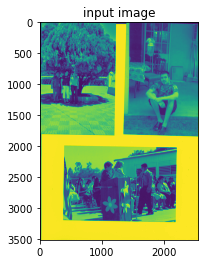

In [10]:
#https://stackoverflow.com/questions/41746416/automatically-cropping-an-image-using-python
#https://stackoverflow.com/questions/14211340/automatically-cropping-an-image-with-python-pil
#https://stackoverflow.com/questions/12833232/auto-cropping-images-with-pil

import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

#imread needs to be read in grayscale for threshhold to work
img=cv2.imread('data/Image (3).jpg',0)
if img is None:
    sys.exit("No input image") #good practice
    
plt.imshow(img)
plt.title('input image')
plt.show()

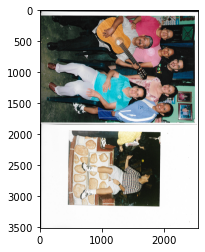

In [21]:
rgb=cv2.imread('data/Image (5).jpg',1)
if img is None:
    sys.exit("No input image") #good practice
    
#plt.imshow(rgb)
plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))

In [66]:
#https://piratefsh.github.io/image-processing-101/

#thresholding your image to keep all but the background (I took a version of your
#image with a white background, you may have to adapt the threshold

thresh=cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV);
res=thresh[1]

#dilating the result to connect all small components in your image
#I think this is where the color gets fucked
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
for i in range(10):
    res=cv2.dilate(res,kernel)

#Finding the contours
contours,img2=cv2.findContours(res,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [69]:
#contours
cnt = contours[4]
#contours

#cv2.drawContours(img2, [cnt], 0, (0,255,0), 3)
###########################################################

array([[[  4,   4,   4],
        [  7,   7,   7],
        [  6,   6,   6],
        ...,
        [ 17,  17,  17],
        [ 22,  22,  22],
        [ 23,  23,  23]],

       [[  9,   9,   9],
        [ 10,  10,  10],
        [  6,   6,   6],
        ...,
        [ 33,  33,  33],
        [ 35,  35,  35],
        [ 25,  25,  25]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 10,  10,  10],
        ...,
        [ 28,  28,  28],
        [ 37,  37,  37],
        [ 51,  51,  51]],

       ...,

       [[ 78,  78,  78],
        [143, 143, 143],
        [  6,   6,   6],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [254, 254, 254]],

       [[ 73,  73,  73],
        [129, 129, 129],
        [  0,   0,   0],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [254, 254, 254]],

       [[ 70,  70,  70],
        [110, 110, 110],
        [  0,   0,   0],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]]

In [68]:
cpt=0
MIN_SHAPE = np.asarray((1200, 1200))
for contour in contours:
    #finding the bounding rectangle of your contours
    rect=cv2.boundingRect(contour)
    
    #cropping the image to the value of the bounding rectangle
    img2=rgb[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    #if over 200kb
    if img2.size * img2.itemsize > 200000:
        cv2.imwrite("output/"+str(cpt)+".jpg", img2)
        cpt=cpt+1;
#     print(cpt)
    #print(img2.size * img2.itemsize)